In [1]:
import numpy as np
import scipy
from scipy import fftpack
import aesara
from aesara import tensor as T
from matplotlib import pyplot as plt
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = [24, 5.6]

In [2]:
class Layer(object):
    def __init__(self, inputs, shape: tuple, activation = None):
        self.W = aesara.shared(np.random.normal(0, 1, (shape[0], shape[1])))
        self.b = aesara.shared((-.1) * np.ones((1, shape[1])))
        self.linear_comb = T.dot(inputs, self.W) + self.b
        self.act = activation
        if activation:
            self.activated = self.act(self.linear_comb)
        else:
            self.activated = self.linear_comb

$ Loss = \frac{(\hat{y} - y)^2}2 $, where $ \hat{y} = w x + b $.

$$ \begin{align*}
\frac{\partial}{\partial{w}} Loss &= (\hat{y} - y) \frac{\partial}{\partial{w}} (\hat{y} - y) \\
&= (\hat{y} - y) \frac{\partial}{\partial{w}} (w x + b - y) \\
&= (\hat{y} - y) x \\
\end{align*} $$

$$ \begin{align*}
\frac{\partial}{\partial{b}} Loss &= (\hat{y} - y) \frac{\partial}{\partial{b}} (\hat{y} - y) \\
&= (\hat{y} - y) \frac{\partial}{\partial{b}} (w x + b - y) \\
&= (\hat{y} - y) \\
\end{align*} $$

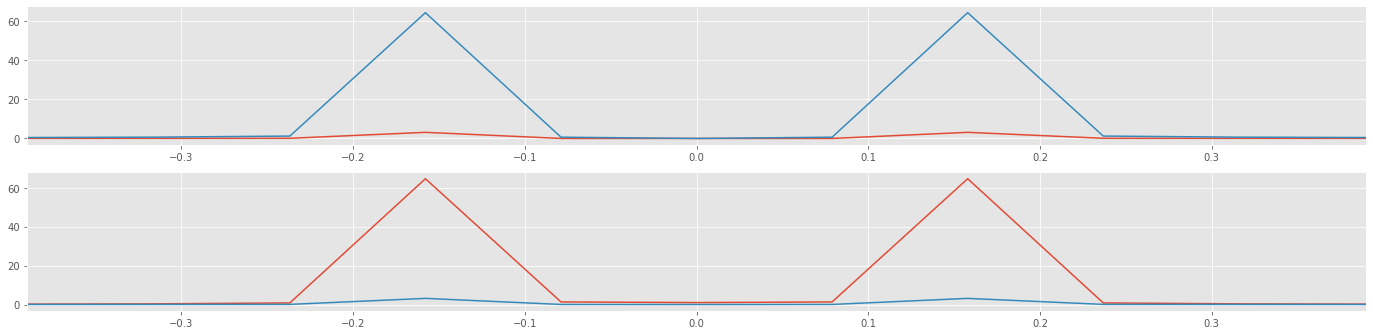

In [3]:
x = np.linspace(0., 4 * np.pi, 128 + 1, endpoint=True)
y1 = np.sin(x)
y2 = np.cos(x)
x_freq = scipy.fftpack.fftfreq(len(x), np.pi / 32)
x_freq_shifted = scipy.fftpack.fftshift(x_freq)
y1_fft = scipy.fftpack.fft(y1)
y2_fft = scipy.fftpack.fft(y2)
y1_fft_shifted = scipy.fftpack.fftshift(y1_fft)
y2_fft_shifted = scipy.fftpack.fftshift(y2_fft)
with plt.rc_context({}):
    plt.subplot(211)
    plt.plot(x_freq_shifted, np.abs(y1_fft_shifted.real))
    plt.plot(x_freq_shifted, np.abs(y1_fft_shifted.imag))
    plt.xlim(-.39, .39)
    plt.subplot(212)
    plt.plot(x_freq_shifted, np.abs(y2_fft_shifted.real))
    plt.plot(x_freq_shifted, np.abs(y2_fft_shifted.imag))
    plt.xlim(-.39, .39)
    plt.show()

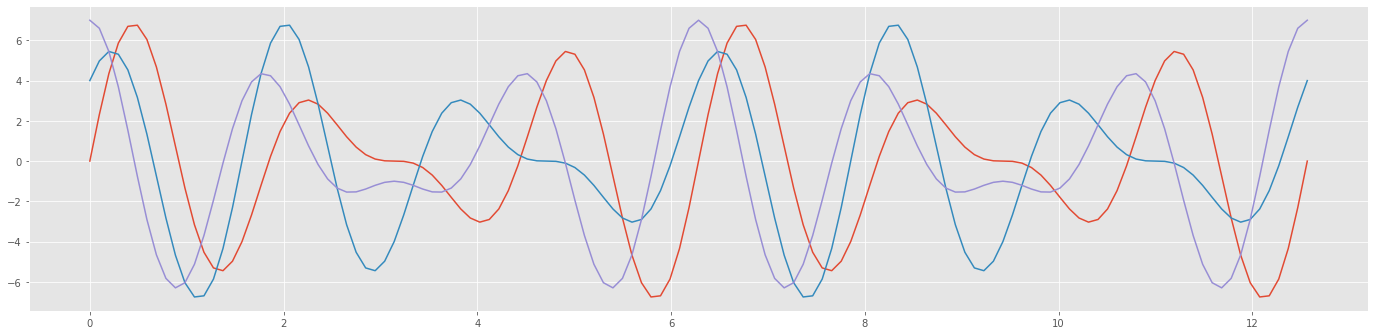

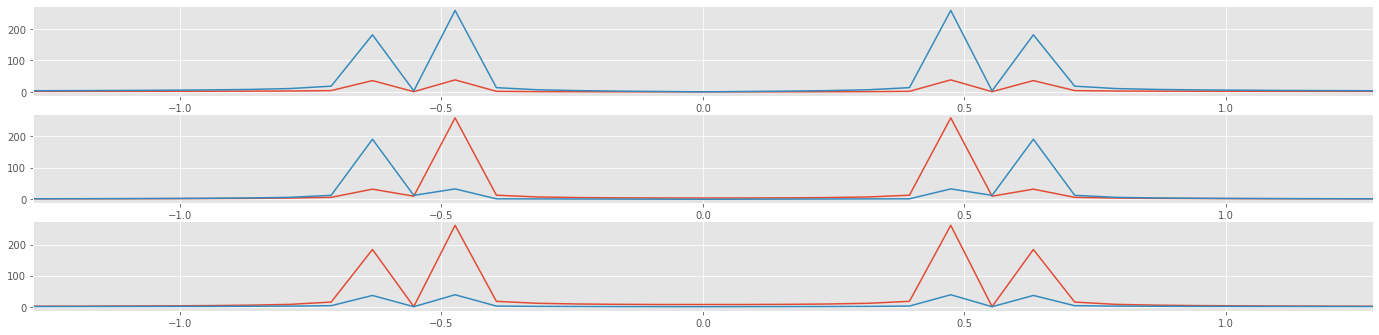

In [4]:
y3 = 3 * np.sin(4 * x) + 4 * np.sin(3 * x)
y4 = 3 * np.sin(4 * x) + 4 * np.cos(3 * x)
y5 = 3 * np.cos(4 * x) + 4 * np.cos(3 * x)
y3fs = scipy.fftpack.fftshift(scipy.fftpack.fft(y3))
y4fs = scipy.fftpack.fftshift(scipy.fftpack.fft(y4))
y5fs = scipy.fftpack.fftshift(scipy.fftpack.fft(y5))
with plt.rc_context({}):
    plt.plot(x, y3)
    plt.plot(x, y4)
    plt.plot(x, y5)
    plt.show()
    plt.subplot(311)
    #plt.plot(x_freq_shifted, np.abs(y3fs))
    plt.plot(x_freq_shifted, np.abs(y3fs.real))
    plt.plot(x_freq_shifted, np.abs(y3fs.imag))
    plt.xlim(-1.28, 1.28)
    plt.subplot(312)
    #plt.plot(x_freq_shifted, np.abs(y4fs))
    plt.plot(x_freq_shifted, np.abs(y4fs.real))
    plt.plot(x_freq_shifted, np.abs(y4fs.imag))
    plt.xlim(-1.28, 1.28)
    plt.subplot(313)
    #plt.plot(x_freq_shifted, np.abs(y5fs))
    plt.plot(x_freq_shifted, np.abs(y5fs.real))
    plt.plot(x_freq_shifted, np.abs(y5fs.imag))
    plt.xlim(-1.28, 1.28)
    plt.show()

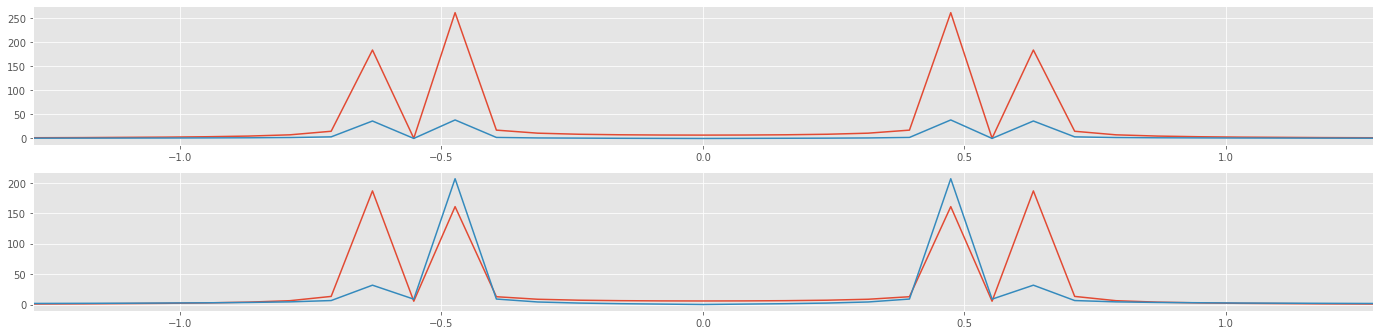

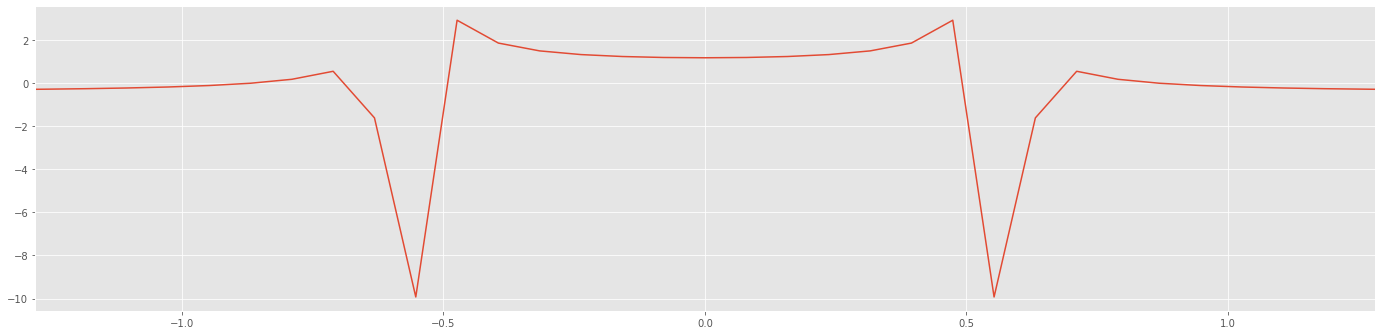

In [5]:
y6 = 3 * np.cos(4 * x) + 4 * np.cos(3 * x + np.pi / 4)
y6fs = scipy.fftpack.fftshift(scipy.fftpack.fft(y6))
with plt.rc_context({}):
    plt.subplot(211)
    plt.plot(x_freq_shifted, np.abs(y5fs.real))
    plt.plot(x_freq_shifted, np.abs(y5fs.imag))
    plt.xlim(-1.28, 1.28)
    plt.subplot(212)
    plt.plot(x_freq_shifted, np.abs(y6fs.real))
    plt.plot(x_freq_shifted, np.abs(y6fs.imag))
    plt.xlim(-1.28, 1.28)
    plt.show()
    plt.plot(x_freq_shifted, np.abs(y5fs) - np.abs(y6fs))
    plt.xlim(-1.28, 1.28)
    plt.show()